<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## <Coloque aqui o Título da Análise>

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Adriana Fujita, 1115665' #@param {type:"string"}
Aluno2 = 'Daniel Henrique, 9456177' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}





# **Resumo (*Abstract*)**

Apresente um parágrafo um resumo do seu trabalho.

# **Introdução**

Faça uma breve introdução do seu trabalho. Conceitue os pontos relevantes do seu  problema e, se for o caso, das técnicas de análise empregadas. Discuta a relevância, atualidade, limitações das análises existentes e o impacto que  sua análise pode trazer.

# **Descrição e origem dos dados**

Descreva sumariamente a fonte e os dados empregados.








In [3]:
# Instalacao do PySUS
!apt install libffi-dev
!pip install PySUS pandas numpy matplotlib seaborn

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m6/8 [matplotlib]


In [4]:
#@title #**Importando Bibliotecas**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca PySUS
from pysus.online_data.Infogripe import list_datasets, download

In [89]:
# Carregando os dados

# Dados de performance escolar
df_municipios_anos_iniciais = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/indicadores-desempenho-escolar/divulgacao_anos_iniciais_municipios_2023.csv',
                                             delimiter=';')
df_municipios_anos_finais = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/indicadores-desempenho-escolar/divulgacao_anos_finais_municipios_2023.csv',
                                           delimiter=';')
df_municipios_ensino_medio = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/indicadores-desempenho-escolar/divulgacao_ensino_medio_municipios_2023.csv',
                                            delimiter=';')

In [90]:
df_municipios_ensino_medio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SG_UF                    11721 non-null  object
 1   CO_MUNICIPIO             11721 non-null  int64 
 2   NO_MUNICIPIO             11721 non-null  object
 3   REDE                     11721 non-null  object
 4   VL_APROVACAO_2017_SI_4   11721 non-null  object
 5   VL_APROVACAO_2017_1      11721 non-null  object
 6   VL_APROVACAO_2017_2      11721 non-null  object
 7   VL_APROVACAO_2017_3      11721 non-null  object
 8   VL_APROVACAO_2017_4      11721 non-null  object
 9   VL_INDICADOR_REND_2017   11721 non-null  object
 10  VL_APROVACAO_2019_SI_4   11721 non-null  object
 11  VL_APROVACAO_2019_1      11721 non-null  object
 12  VL_APROVACAO_2019_2      11721 non-null  object
 13  VL_APROVACAO_2019_3      11721 non-null  object
 14  VL_APROVACAO_2019_4      11721 non-nul

In [55]:
# Listando os datasets disponiveis do infogripe
list_datasets()

['Alerta de situação',
 'Casos por idade, sexo e virus',
 'Casos Totais e estimativas',
 'Valores esperados por localidades']

In [7]:
# Dados do infogripe

df_alerta_sit = download("Alerta de situação")

# Erro na chamada do banco de dados do PySUS
# df_totals = download("Casos Totais e estimativas")
# df_totals

# Criacao de nova funcao de download
BASEURL = r"https://gitlab.fiocruz.br/marcelo.gomes/infogripe/-/raw/master/Dados/InfoGripe/"  # noqa
DATASETS = {
  "Alerta de situação": r"tabela_de_alerta.csv",
  "Casos por idade, sexo e virus": r"dados_semanais_faixa_etaria_sexo_virus.csv.gz",  # noqa
  "Casos Totais e estimativas": r"serie_temporal_com_estimativas_recentes.csv.gz",  # noqa
  "Valores esperados por localidades": "valores_esperados_por_localidade.csv",  # noqa
}

def download(dataset_name):
  if DATASETS[dataset_name].endswith('z'):
    url = BASEURL + DATASETS[dataset_name] + "?inline=false"
    df = pd.read_csv(url, delimiter=";", decimal=",", compression='gzip')
  else:
    url = BASEURL + DATASETS[dataset_name] + "?inline=false"
    df = pd.read_csv(url, delimiter=";", decimal=",")
  return df

df_gripe_idade = download("Casos por idade, sexo e virus")
df_casos_totais = download('Casos Totais e estimativas')

In [56]:
df_gripe_idade.head()

,data de publicação,UF,Unidade da Federação,Tipo,dado,escala,sexo,Ano epidemiológico,Semana epidemiológica,Ano e semana epidemiológica,...,Vírus sincicial respiratório (VSR),Parainfluenza 1,Parainfluenza 2,Parainfluenza 3,Parainfluenza 4,Adenovirus,Rinovirus,Bocavirus,Metapneumovirus,Outros virus
0,2024-06-04,11,Rondônia,Estado,srag,incidência,F,2009,1,2009W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-06-04,11,Rondônia,Estado,srag,incidência,M,2009,1,2009W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-06-04,11,Rondônia,Estado,srag,incidência,Total,2009,1,2009W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-06-04,11,Rondônia,Estado,srag,incidência,F,2009,2,2009W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-06-04,11,Rondônia,Estado,srag,incidência,M,2009,2,2009W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df_gripe_idade[["< 2 anos", "0-4 anos", "10-19 anos"]]

,< 2 anos,0-4 anos,10-19 anos
0,NaN,0.0,0.0
1,NaN,0.0,0.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
...,...,...,...
952597,10.0,NaN,0.0
952598,1.0,NaN,1.0
952599,0.0,NaN,0.0
952600,0.0,NaN,1.0


In [8]:
# Dados do infodengue
from pysus.online_data.Infodengue import search_string, download

dict_cidades = search_string('São Paulo')
nome_cidades = list(dict_cidades.keys())


In [61]:
# Criando dataframes para cada cidade de SP
from itertools import product

doencas = ['dengue', 'zika', 'chikungunya']
df_cidades_dengue = {}
df_cidades_zika = {}
df_cidades_chik = {}

# for doenca, cidade in product(doencas, nome_cidades):
#     df = download(doenca, 201701, 202401, cidade)
#     df_cidades[cidade] = df

for cidade in nome_cidades:
  df = download('dengue', 201101, 202352, cidade)
  df_cidades_dengue[cidade] = df

for cidade in nome_cidades:
  df = download('zika', 201101, 202352, cidade)
  df_cidades_zika[cidade] = df

for cidade in nome_cidades:
  df = download('chikungunya', 201101, 202352, cidade)
  df_cidades_chik[cidade] = df

In [71]:
df_cidades_chik['São Paulo'].head()

SE,202352,202351,202350,202349,202348,202347,202346,202345,202344,202343,...,201110,201109,201108,201107,201106,201105,201104,201103,201102,201101
data_iniSE,2023-12-24,2023-12-17,2023-12-10,2023-12-03,2023-11-26,2023-11-19,2023-11-12,2023-11-05,2023-10-29,2023-10-22,...,2011-03-06,2011-02-27,2011-02-20,2011-02-13,2011-02-06,2011-01-30,2011-01-23,2011-01-16,2011-01-09,2011-01-02
casos_est,10.0,16.0,16.0,18.0,16.0,21.0,14.0,19.0,13.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
casos_est_min,10,16,16,18,16,21,14,19,13,12,...,0,0,0,0,0,0,0,0,0,0
casos_est_max,10,16,16,18,16,21,14,19,13,12,...,0,0,0,0,0,0,0,0,0,0
casos,10,16,16,18,16,21,14,19,13,12,...,0,0,0,0,0,0,0,0,0,0


# **Aquisição e Preparação dos dados**

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis).








# Tratamento dos dados de performance escolar

## Alterando a tabela para encaixar na janela de tempo 2017-2023

In [81]:
#@title ###Analise dos dados de performance escolar a partir de 2017

# Ajustando os dados de performance escolar
colunas_copiadas = df_municipios_anos_iniciais.columns[:4]
df_municipios_anos_iniciais_tratado = df_municipios_anos_iniciais[colunas_copiadas].copy()

# Anos estão presentes nas colunas que contem
years = ['2011', '2013', '2015', '2017', '2019', '2021', '2023']

for col in df_municipios_anos_iniciais.columns[4:]:
  if any(year in col for year in years):
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais[col].copy()
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].str.replace('*', '')

    # Definindo valores NaN
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].replace(['-', 'ND'], np.nan)

    # Trocando formato de número para ponto
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].str.replace(',', '.')

    # Trocando dtype de object para float
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].astype(float)

# Verificando resultados
df_municipios_anos_iniciais_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UF                    14497 non-null  object 
 1   CO_MUNICIPIO             14497 non-null  int64  
 2   NO_MUNICIPIO             14497 non-null  object 
 3   REDE                     14497 non-null  object 
 4   VL_APROVACAO_2011_SI_4   13378 non-null  float64
 5   VL_APROVACAO_2011_SI     12818 non-null  float64
 6   VL_APROVACAO_2011_1      13065 non-null  float64
 7   VL_APROVACAO_2011_2      13184 non-null  float64
 8   VL_APROVACAO_2011_3      13283 non-null  float64
 9   VL_APROVACAO_2011_4      13321 non-null  float64
 10  VL_INDICADOR_REND_2011   13377 non-null  float64
 11  VL_APROVACAO_2013_SI_4   12883 non-null  float64
 12  VL_APROVACAO_2013_SI     12436 non-null  float64
 13  VL_APROVACAO_2013_1      12577 non-null  float64
 14  VL_APROVACAO_2013_2   

In [110]:
#@title ###Realizando o mesmo processo para as tabelas restantes

# Ensino fundamental - Anos finais
colunas_copiadas = df_municipios_anos_finais.columns[:4]
df_municipios_anos_finais_tratado = df_municipios_anos_finais[colunas_copiadas].copy()

for col in df_municipios_anos_finais.columns[4:]:
  if any(year in col for year in years):
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais[col].copy()
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].str.replace('*', '')
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].replace(['-', 'ND'], np.nan)
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].str.replace(',', '.')
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].astype(float)

# Ensino médio
colunas_copiadas = df_municipios_ensino_medio.columns[:4]
df_municipios_ensino_medio_tratado = df_municipios_ensino_medio[colunas_copiadas].copy()

for col in df_municipios_ensino_medio.columns[4:]:
  if any(year in col for year in years):
    df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio[col].copy()
    df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].str.replace('*', '')
    df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].replace(['-', 'ND'], np.nan)
    df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].str.replace(',', '.')
    df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].astype(float)

df_municipios_ensino_medio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SG_UF                    11721 non-null  object
 1   CO_MUNICIPIO             11721 non-null  int64 
 2   NO_MUNICIPIO             11721 non-null  object
 3   REDE                     11721 non-null  object
 4   VL_APROVACAO_2017_SI_4   11721 non-null  object
 5   VL_APROVACAO_2017_1      11721 non-null  object
 6   VL_APROVACAO_2017_2      11721 non-null  object
 7   VL_APROVACAO_2017_3      11721 non-null  object
 8   VL_APROVACAO_2017_4      11721 non-null  object
 9   VL_INDICADOR_REND_2017   11721 non-null  object
 10  VL_APROVACAO_2019_SI_4   11721 non-null  object
 11  VL_APROVACAO_2019_1      11721 non-null  object
 12  VL_APROVACAO_2019_2      11721 non-null  object
 13  VL_APROVACAO_2019_3      11721 non-null  object
 14  VL_APROVACAO_2019_4      11721 non-nul

## Alterando os dados para apenas São Paulo, nos municípios que estão nos dados do PySUS

In [111]:
# Utilizando os codigos de municipio
codigos_cidades = list(dict_cidades.values())

# Filtrando apenas os dados de São Paulo
df_municipios_anos_iniciais_tratado = df_municipios_anos_iniciais_tratado[df_municipios_anos_iniciais_tratado['CO_MUNICIPIO'].isin(codigos_cidades)]

# Verificando resultado
df_municipios_anos_iniciais_tratado.NO_MUNICIPIO.unique()

array(['São Paulo de Olivença', 'Sampaio', 'São Valério', 'São Julião',
       'São Miguel', 'São Paulo do Potengi', 'São Pedro', 'São Rafael',
       'São Caitano', 'Frei Paulo', 'Santo Amaro', 'Sapeaçu',
       'Campo Azul', 'Pouso Alto', 'São Geraldo', 'São Tiago',
       'São Mateus', 'São Gonçalo', 'São Carlos',
       "São João do Pau d'Alho", 'São Manuel', 'São Paulo', 'São Simão',
       'Serra Azul', 'União Paulista', 'Capão Alto', 'São Ludgero',
       'Santo Ângelo', 'Santo Augusto', 'São Gabriel', 'São Marcos',
       'São Nicolau', 'São Paulo das Missões', 'Sapezal', 'Barro Alto',
       'São Patrício'], dtype=object)

In [112]:
# Filtrando ensino fundamental (anos finais)
df_municipios_anos_finais_tratado = df_municipios_anos_finais_tratado[df_municipios_anos_finais_tratado['CO_MUNICIPIO'].isin(codigos_cidades)]

# Filtrando ensino médio
df_municipios_ensino_medio_tratado = df_municipios_ensino_medio_tratado[df_municipios_ensino_medio_tratado['CO_MUNICIPIO'].isin(codigos_cidades)]

## Filtrando datasets do infogripe

In [124]:
# Reduzindo o dataset de gripe para apenas São Paulo e no período de 2017-2023
df_gripe_idade_tratado = df_gripe_idade[df_gripe_idade['Unidade da Federação'] == 'São Paulo']
df_gripe_idade_tratado = df_gripe_idade_tratado[df_gripe_idade['Ano epidemiológico'].isin([2011, 2013, 2015, 2017,2019,2021,2023])].copy()

df_gripe_idade_tratado


/tmp/ipykernel_5340/2810699365.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gripe_idade_tratado = df_gripe_idade_tratado[df_gripe_idade['Ano epidemiológico'].isin([2011, 2013, 2015, 2017,2019,2021,2023])].copy()


,data de publicação,UF,Unidade da Federação,Tipo,dado,escala,sexo,Ano epidemiológico,Semana epidemiológica,Ano e semana epidemiológica,...,Vírus sincicial respiratório (VSR),Parainfluenza 1,Parainfluenza 2,Parainfluenza 3,Parainfluenza 4,Adenovirus,Rinovirus,Bocavirus,Metapneumovirus,Outros virus
46140,2024-06-04,35,São Paulo,Estado,srag,incidência,F,2011,1,2011W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004593
46141,2024-06-04,35,São Paulo,Estado,srag,incidência,M,2011,1,2011W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
46142,2024-06-04,35,São Paulo,Estado,srag,incidência,Total,2011,1,2011W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002332
46143,2024-06-04,35,São Paulo,Estado,srag,incidência,F,2011,2,2011W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
46144,2024-06-04,35,São Paulo,Estado,srag,incidência,M,2011,2,2011W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897837,2024-06-04,35,São Paulo,Estado,obito,casos,Total,2023,51,2023W51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
897838,2024-06-04,35,São Paulo,Estado,obito,casos,F,2023,52,2023W52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
897839,2024-06-04,35,São Paulo,Estado,obito,casos,I,2023,52,2023W52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
897840,2024-06-04,35,São Paulo,Estado,obito,casos,M,2023,52,2023W52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [15]:
# Transpondo dados de dengue, zika e chikungunya

df_cidades_dengue_transposto = {}
df_cidades_zika_transposto = {}
df_cidades_chik_transposto = {}

for cidade in nome_cidades:
  df_cidades_dengue_transposto[cidade] = df_cidades_dengue[cidade].T
  df_cidades_zika_transposto[cidade] = df_cidades_zika[cidade].T
  df_cidades_chik_transposto[cidade] = df_cidades_chik[cidade].T

In [16]:
df_alerta_sit_tratado = df_alerta_sit[df_alerta_sit["Unidade da Federação"] == "São Paulo"]
df_alerta_sit_tratado

,UF,Unidade da Federação,dado,escala,Ano epidemiológico,Semana epidemiológica,casos estimados,média móvel,nível semanal,nível por média móvel
50,35,São Paulo,srag,incidência,2024,21,0.996191,1.028691,valor epidêmico,Amarelo
51,35,São Paulo,srag,incidência,2024,22,0.792713,NaN,valor epidêmico,NaN


# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## **Q1. Pergunta 1.** Quais são as doenças endêmicas de notificação obrigatória mais correlacionadas ao clima no estado de São Paulo?

As doenças endêmicas notificadas são...

In [125]:
# seu código
df_gripe_agg = df_gripe_idade_tratado.groupby(['Ano epidemiológico', 'Unidade da Federação'])['Casos semanais reportados até a última atualização']
df_gripe_agg = df_gripe_agg.sum().reset_index()
df_gripe_agg.head()
# df_gripe_idade_tratado.info()
df_gripe_idade_tratado

,data de publicação,UF,Unidade da Federação,Tipo,dado,escala,sexo,Ano epidemiológico,Semana epidemiológica,Ano e semana epidemiológica,...,Vírus sincicial respiratório (VSR),Parainfluenza 1,Parainfluenza 2,Parainfluenza 3,Parainfluenza 4,Adenovirus,Rinovirus,Bocavirus,Metapneumovirus,Outros virus
46140,2024-06-04,35,São Paulo,Estado,srag,incidência,F,2011,1,2011W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004593
46141,2024-06-04,35,São Paulo,Estado,srag,incidência,M,2011,1,2011W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
46142,2024-06-04,35,São Paulo,Estado,srag,incidência,Total,2011,1,2011W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002332
46143,2024-06-04,35,São Paulo,Estado,srag,incidência,F,2011,2,2011W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
46144,2024-06-04,35,São Paulo,Estado,srag,incidência,M,2011,2,2011W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897837,2024-06-04,35,São Paulo,Estado,obito,casos,Total,2023,51,2023W51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
897838,2024-06-04,35,São Paulo,Estado,obito,casos,F,2023,52,2023W52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
897839,2024-06-04,35,São Paulo,Estado,obito,casos,I,2023,52,2023W52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
897840,2024-06-04,35,São Paulo,Estado,obito,casos,M,2023,52,2023W52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [136]:
# Selecionando IDEB de anos iniciais para o mesmo ano
df_escolaridade_anos_iniciais = df_municipios_anos_iniciais_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_OBSERVADO_2011', 'VL_OBSERVADO_2013', 'VL_OBSERVADO_2015', 'VL_OBSERVADO_2017', 'VL_OBSERVADO_2019', 'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023']]
df_escolaridade_anos_finais = df_municipios_anos_finais_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_OBSERVADO_2011', 'VL_OBSERVADO_2013', 'VL_OBSERVADO_2015', 'VL_OBSERVADO_2017', 'VL_OBSERVADO_2019', 'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023']]
df_escolaridade_ensino_medio = df_municipios_ensino_medio_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_OBSERVADO_2017', 'VL_OBSERVADO_2019', 'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023']]

# Fazendo o melt para transformar em formato longo
df_escolaridade_ai_long = pd.melt(
    df_escolaridade_anos_iniciais, 
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'], 
    value_vars=["VL_OBSERVADO_2011", "VL_OBSERVADO_2013", "VL_OBSERVADO_2015", "VL_OBSERVADO_2017", "VL_OBSERVADO_2019", "VL_OBSERVADO_2021", "VL_OBSERVADO_2023"],
    var_name='Ano_Escolaridade',
    value_name='IDEB'
)

df_escolaridade_af_long = pd.melt(
    df_escolaridade_anos_finais, 
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'], 
    value_vars=["VL_OBSERVADO_2011", "VL_OBSERVADO_2013", "VL_OBSERVADO_2015", "VL_OBSERVADO_2017", "VL_OBSERVADO_2019", "VL_OBSERVADO_2021", "VL_OBSERVADO_2023"],
    var_name='Ano_Escolaridade',
    value_name='IDEB'
)

df_escolaridade_ai_long['Ano_Escolaridade'] = df_escolaridade_ai_long['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)
df_escolaridade_af_long['Ano_Escolaridade'] = df_escolaridade_af_long['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)

# Agrupando todos os dados para contar o valor para o estado de São Paulo por ano
df_escolaridade_ai_agg = df_escolaridade_ai_long.groupby(['Ano_Escolaridade'])['IDEB'].mean().reset_index()
df_escolaridade_af_agg = df_escolaridade_af_long.groupby(['Ano_Escolaridade'])['IDEB'].mean().reset_index()

df_escolaridade_ai_agg["Estado"] = "São Paulo"
df_escolaridade_af_agg["Estado"] = "São Paulo"

In [137]:
df_merge_gripe_escolaridade_ai = pd.merge(
    df_gripe_agg, 
    df_escolaridade_ai_agg, 
    left_on=['Ano epidemiológico', 'Unidade da Federação'], 
    right_on=['Ano_Escolaridade', 'Estado']
)

df_merge_gripe_escolaridade_af = pd.merge(
    df_gripe_agg, 
    df_escolaridade_af_agg, 
    left_on=['Ano epidemiológico', 'Unidade da Federação'], 
    right_on=['Ano_Escolaridade', 'Estado']
)

df_merge_gripe_escolaridade_ai

,Ano epidemiológico,Unidade da Federação,Casos semanais reportados até a última atualização,Ano_Escolaridade,IDEB,Estado
0,2011,São Paulo,1527.304668,2011,4.911494,São Paulo
1,2013,São Paulo,24963.479464,2013,5.162222,São Paulo
2,2015,São Paulo,5751.380466,2015,5.432184,São Paulo
3,2017,São Paulo,14203.106342,2017,5.643820,São Paulo
4,2019,São Paulo,22983.118580,2019,5.732530,São Paulo
5,2021,São Paulo,772568.265611,2021,5.557831,São Paulo
6,2023,São Paulo,71136.876216,2023,5.746512,São Paulo


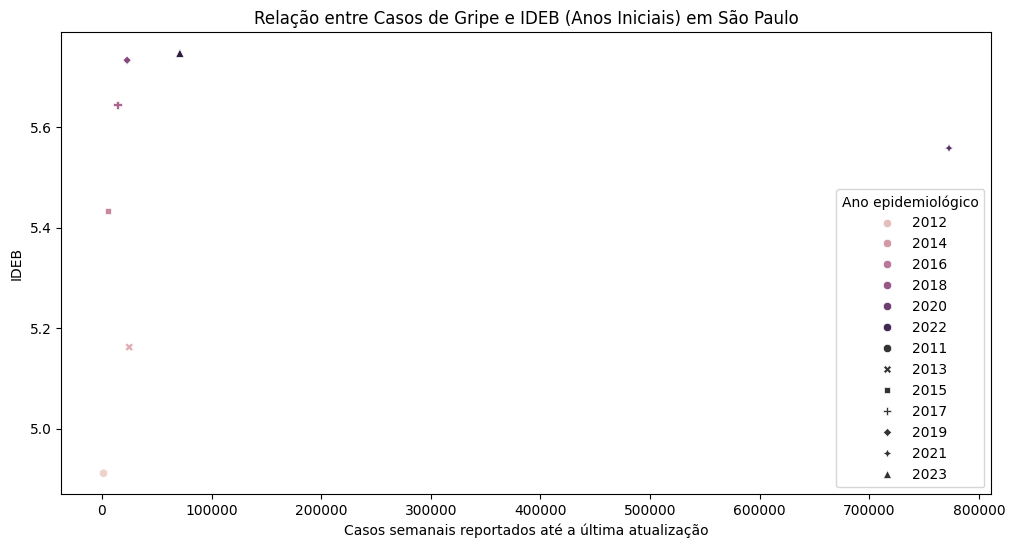

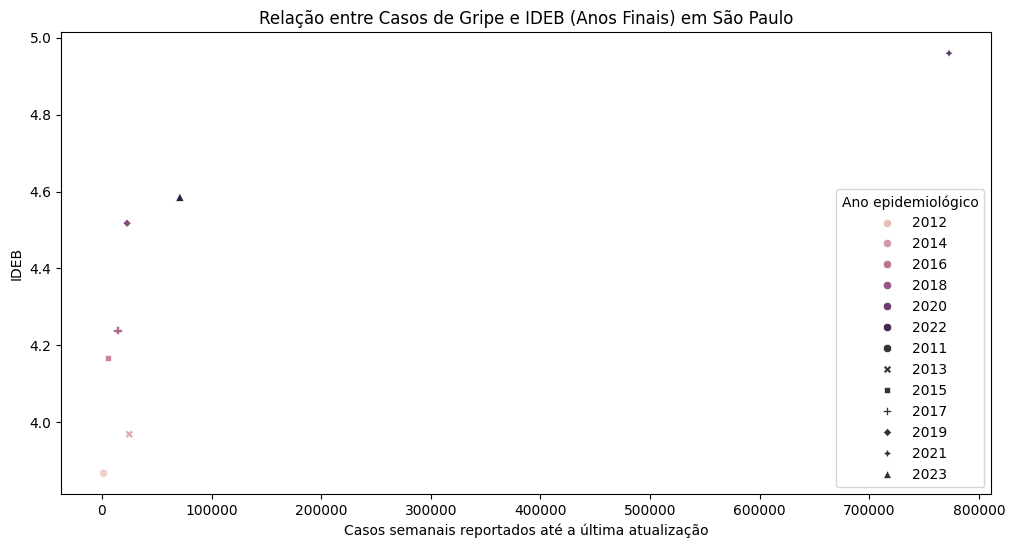

In [138]:
# Scatter plot para analisar a relação entre casos de gripe e IDEB (anos iniciais e finais) em subplots

# Primeiro subplot - Anos Iniciais
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_merge_gripe_escolaridade_ai,
    x='Casos semanais reportados até a última atualização',
    y='IDEB',
    hue='Ano epidemiológico',
    style='Ano epidemiológico',
)
plt.title('Relação entre Casos de Gripe e IDEB (Anos Iniciais) em São Paulo')

# Segundo subplot - Anos Finais
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_merge_gripe_escolaridade_af,
    x='Casos semanais reportados até a última atualização',
    y='IDEB',
    hue='Ano epidemiológico',
    style='Ano epidemiológico',
)
plt.title('Relação entre Casos de Gripe e IDEB (Anos Finais) em São Paulo')

# Plotando os gráficos
plt.show()


# plt.figure(figsize=(12, 6))
# sns.scatterplot(
#     data = df_merge_gripe_escolaridade,
#     x = 'Casos semanais reportados até a última atualização',
#     y = 'IDEB',
#     hue = 'Ano epidemiológico',
#     style = 'Ano epidemiológico',
# )
# plt.title('Relação entre Casos de Gripe e IDEB (Anos Iniciais) em São Paulo')
# plt.xlabel('Casos Semanais de Gripe')
# plt.ylabel('IDEB Anos Iniciais')
# plt.legend(title='Ano Epidemiológico')
# plt.grid(True)
# plt.show()

In [53]:
correlacao = df_merged['IDEB'].corr(df_merged['Casos'])
print(f'Correlação entre IDEB e casos de gripe: {correlacao:.2f}')

NameError: name 'df_merged' is not defined

### **Conclusão**

A gripe viral apresenta uma correlação bastante maior que as demais doenças, com 15% acima da segunda colocada (Chikungunha). O gráfico ainda mostra uma maior incidência nos meses...

# **Referências**

Este é um item obrigatório.

# **Conclusão**

Apresente a conclusão do seu estudo. Indique limitações da tecnologia/conceitos, novos avanços e compare com tecnologias/conceitos concorrentes.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo') # substitua pelo seu vídeo

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)